In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import L2

import matplotlib.pyplot as plt


In [64]:
# Get Data
data = pd.read_csv('./dataset/churn.csv')
data = data.drop(columns=['customer_id', 'country', 'gender'])
X = data.drop(columns=['churn'])
y = data['churn']

# Pre Processing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# print(X)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=0)

model = Sequential()

print(X_train)

model.add(Dense(units=128, activation='relu', input_shape=(8, )))
model.add(Dropout(rate=0.5))
model.add(Dense(units=64, activation='relu', kernel_regularizer=L2(0.005), input_shape=(X_train.shape[1], )))
model.add(Dropout(rate=0.5))
model.add(Dense(units=32, activation='relu', kernel_regularizer=L2(0.005), input_shape=(X_train.shape[1], )))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


[[ 1.61897241  2.00988206 -1.38753759 ...  0.64609167  0.97024255
  -1.43867689]
 [ 1.89833536 -1.5182008  -0.35020386 ...  0.64609167 -1.03067011
  -1.38922361]
 [-0.42968918  0.00745665  1.03290776 ... -1.54776799  0.97024255
   1.31415652]
 ...
 [ 0.87400456 -0.08789694 -1.38753759 ... -1.54776799 -1.03067011
  -0.13685352]
 [ 0.17042381  0.38887101  1.03290776 ...  0.64609167 -1.03067011
  -0.04490188]
 [ 0.48082708  1.15169974 -1.38753759 ...  0.64609167  0.97024255
  -0.80874677]]


In [63]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1)

188/188 [==============================] - 1s 2ms/step - loss: 0.8945 - accuracy: 0.7875 - val_loss: 0.6626 - val_accuracy: 0.8075


In [36]:
# Predict Value
credit_score=100
age=20
tenure=20
balance=100
products_number=100
credit_card=100
active_member=100
estimated_salary=1000000

predict_data = pd.DataFrame([[credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary]])
predict_result = model.predict(predict_data)
print(predict_result)

1/1 [==============================] - 0s 42ms/step
[[1.]]


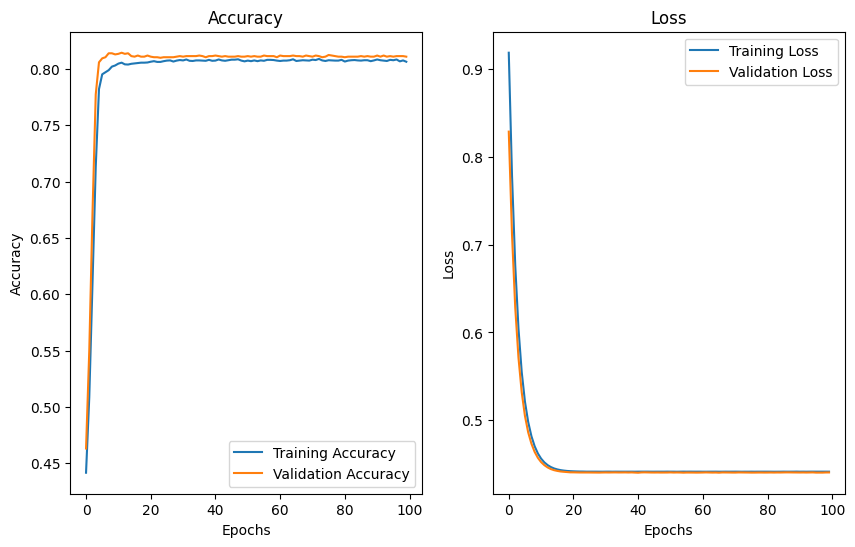

In [32]:
# Plotting


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label ='Training Accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label ='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Loss


plt.show()